![Alt text](Task2.JPG)

### Author: Jan Dennis Zapatos - Data Science and Business Analytics Intern

The Sparks Foundation - Graduate Rotational Internship Program (May 2023)

Here is my take on task#7, but in this project, instead of using the provided dataset, I will create and original perform sentimental and statistical analysis on Philippines Stock Exchange Index (PSEI) price and a compilation of Philippines' news headlines under finance/business/economics categry, and attempt to predict or forecast future price trend using machine learning.

### ANALYZE PSEI PRICE PERFORMANCE USING SENTIMENTAL AND NUMERICAL ANALYSIS, AND FORECAST PRICE USING MACHINE LEARNING

I uploaded the dataset and webscraping code here: https://github.com/Dennis-Zapatos/GRIP-Data-Science-and-Busines-Analytics

# 

##### IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### PREPROCESS FEATURES

In [ ]:
#Import dataset
df_price = pd.read_csv('C:/Users/Jan/Desktop/JAN/GRIP-INTERNSHIP/PSEI-Analysis/PSEI(2014-2023).csv')
df_news = pd.read_csv('C:/Users/Jan/Desktop/JAN/GRIP-INTERNSHIP/PSEI-Analysis/PH-News-MT.csv')
#Transform dataset
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_news['Date'] = pd.to_datetime(df_news['Date']).dropna()
df_price = df_price.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df_news = df_news.set_index('Date').sort_values(by='Date')
df_price = df_price.dropna().set_index('Date').sort_values(by='Date')

display(df_news)
display(df_price)

,Headlines
Date,
2014-01-01,Culture of sharing.
2014-01-01,More coop bank mergers up.
2014-01-01,China Bank looking at over 400 branches this y...
2014-01-01,Cebu wind project gets foreign interest.
2014-01-01,Asean forest network gets boost.
...,...
2023-05-14,3D billboard excellence puts PH in global map.
2023-05-14,Overcoming adversity with digitalization.
2023-05-14,Internet users cautioned against embedded malw...


,Close
Date,
2014-01-02,5984.259766
2014-01-03,5947.930176
2014-01-06,5985.810059
2014-01-07,5947.439941
2014-01-08,5986.479980
...,...
2023-05-08,6600.740234
2023-05-09,6622.609863
2023-05-10,6658.589844


In [ ]:
# Merge news headlines based on date, from 65006 rows to 3221 rows
df_news = df_news.groupby('Date')['Headlines'].apply(' '.join).reset_index()
df_news = df_news.set_index('Date')
display(df_news)

,Headlines
Date,
2014-01-01,Culture of sharing. More coop bank mergers up....
2014-01-02,BSP ready to counter future risks. Peso drops ...
2014-01-03,Philippine statistical agencies to be merged a...
2014-01-05,First full week stock market trade for 2014 st...
2014-01-06,BSP seen retaining policy. Asian marts retreat...
...,...
2023-05-10,San Miguel's F&B unit posts positive quarter. ...
2023-05-11,DMCI Q1 net income plunges 32% to P7.6B. Peso ...
2023-05-12,"Education, behavior key to EPR law success. Pa..."


#### SENTIMENT ANALYSIS

##### Exploratory Data Analysis (EDA): Sentiment Scores

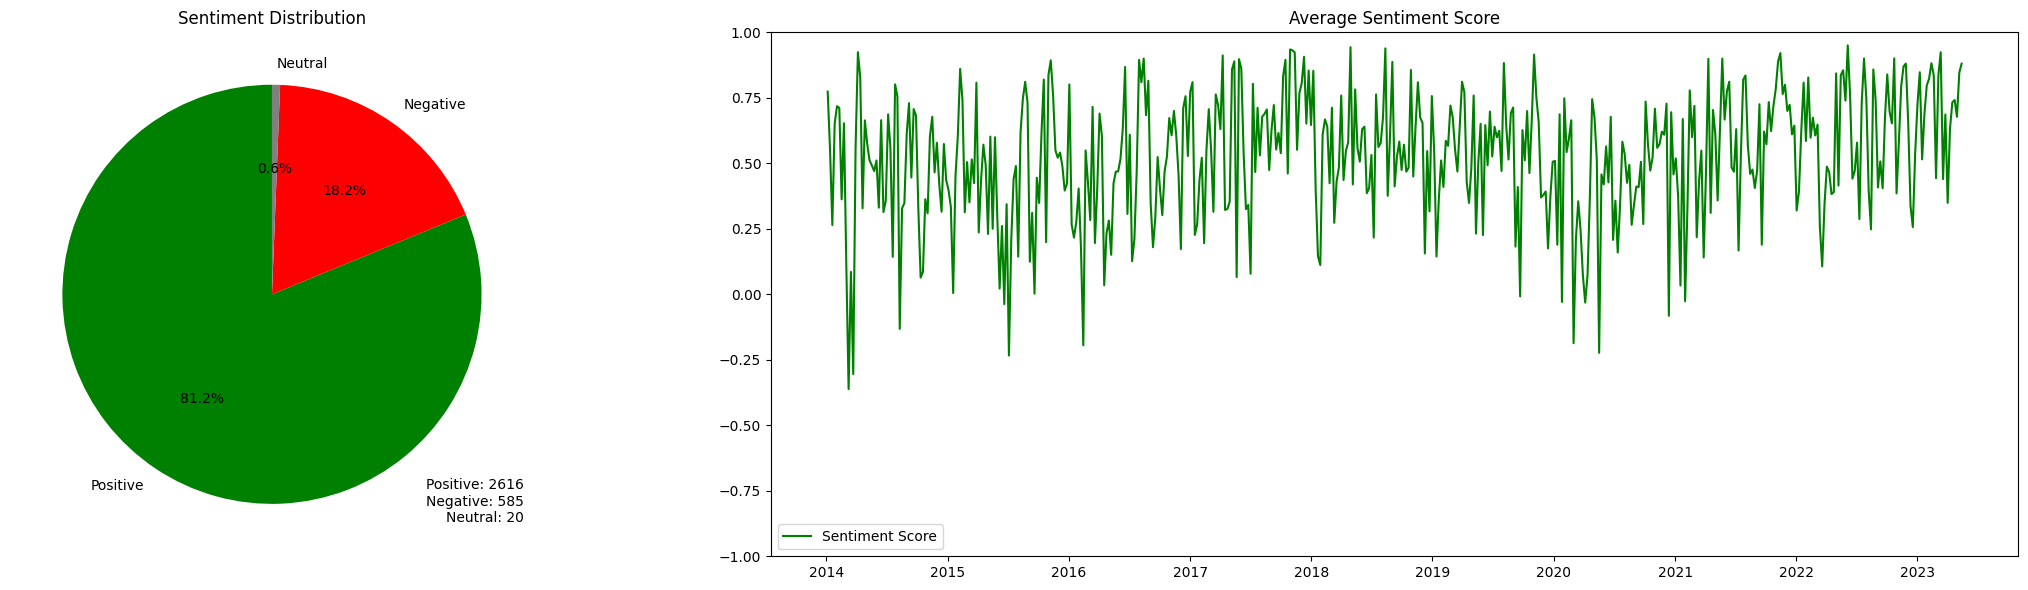

In [ ]:
# Import Sentiment Analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# df_news = df_news.assign(Sentimet_Score='') # adding empty sentiment columns to stock price data

# Extract sentiment score from news headlines
SIA = SentimentIntensityAnalyzer()
df_news['Sentiment Score'] = df_news['Headlines'].apply(lambda x: SIA.polarity_scores(x)['compound'])

## DATA PREPROCESSING
# Categorize the polarity of the sentiment
polarity = ['Positive', 'Negative', 'Neutral']
def_polarity = [
    df_news['Sentiment Score'] > 0,
    df_news['Sentiment Score'] < 0,
    df_news['Sentiment Score'] == 0 ]

df_news['Polarity'] = np.select(def_polarity, polarity)

sent_count = df_news['Polarity'].value_counts() # Calculate the count of each sentiment category

df_sent = df_news.drop(['Headlines', 'Polarity'], axis=1)
df_sent = df_sent.resample('W').mean()  # Get the weekly average sentiment score

# Plot in a grid layout
fig, axs = plt.subplots(1, 2, figsize=(24, 6))
# For pie chart
color = ['g', 'r', 'gray']
axs[0].pie(sent_count, labels=sent_count.index, colors=color, autopct='%1.1f%%', startangle=90)
axs[0].set_aspect("equal")
axs[0].text(1.2, -1.1, '\n'.join(f"{pol}: {count}" for pol, count in sent_count.items()), horizontalalignment='right', verticalalignment='bottom')
axs[0].set_title('Sentiment Distribution')
# For line chart
axs[1].plot(df_sent.index, df_sent['Sentiment Score'], color='g')
axs[1].set_title('Average Sentiment Score')
axs[1].set_ylim(-1, 1)
axs[1].legend(['Sentiment Score'], loc='lower left')
plt.tight_layout()
plt.show()

##### Exploratory Data Analysis (EDA): SENTIMENT SCORE VS. STOCK MARKET PRICE

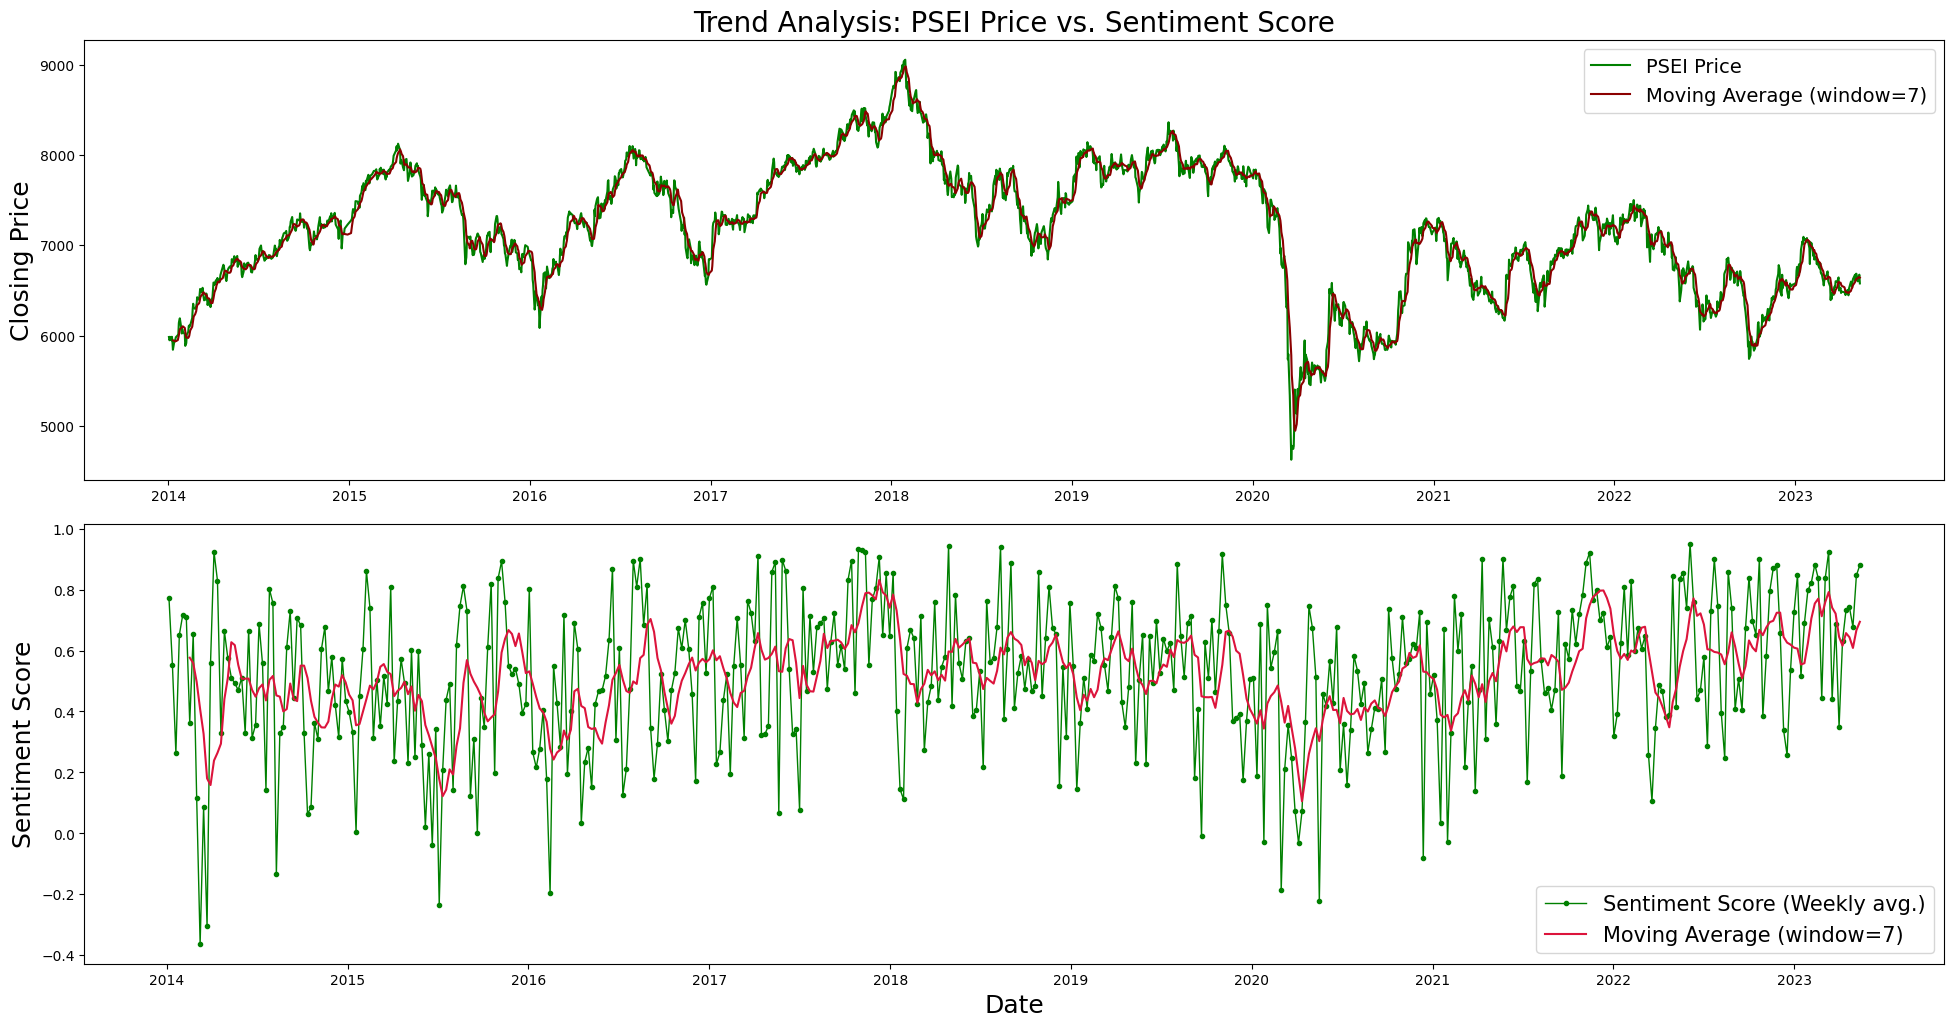

In [ ]:
window_size = 7  # Define the window size for the moving average, 7 window size = 7 data points
# Get moving average of price and sentiment score
price_ma = df_price['Close'].rolling(window=window_size).mean()
sent_ma = df_sent['Sentiment Score'].rolling(window=window_size).mean()

plt.figure(figsize=(24, 12))
plt.subplot(2, 1, 1)
plt.plot(df_price.index, df_price['Close'], color='g', label='PSEI Price')
plt.plot(price_ma, label='Moving Average (window={})'.format(window_size), color= 'DarkRed')
# plt.xlabel('Date',fontsize=14)
plt.ylabel('Closing Price',fontsize=18)
plt.title('Trend Analysis: PSEI Price vs. Sentiment Score', fontsize = 20)
plt.legend(fontsize=14)
plt.subplots_adjust(hspace=0.1)

plt.subplot(2, 1, 2)
plt.plot(df_sent.index,df_sent['Sentiment Score'], color='green', marker='.', linewidth=1, label='Sentiment Score (Weekly avg.)')
plt.plot(sent_ma, label='Moving Average (window={})'.format(window_size), color= 'Crimson')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Sentiment Score',fontsize=18)
plt.legend(fontsize=15)
plt.show()

                                        Sentiment score chart and PSEI price chart, along with their respective Moving Averages were plot together for inspection.

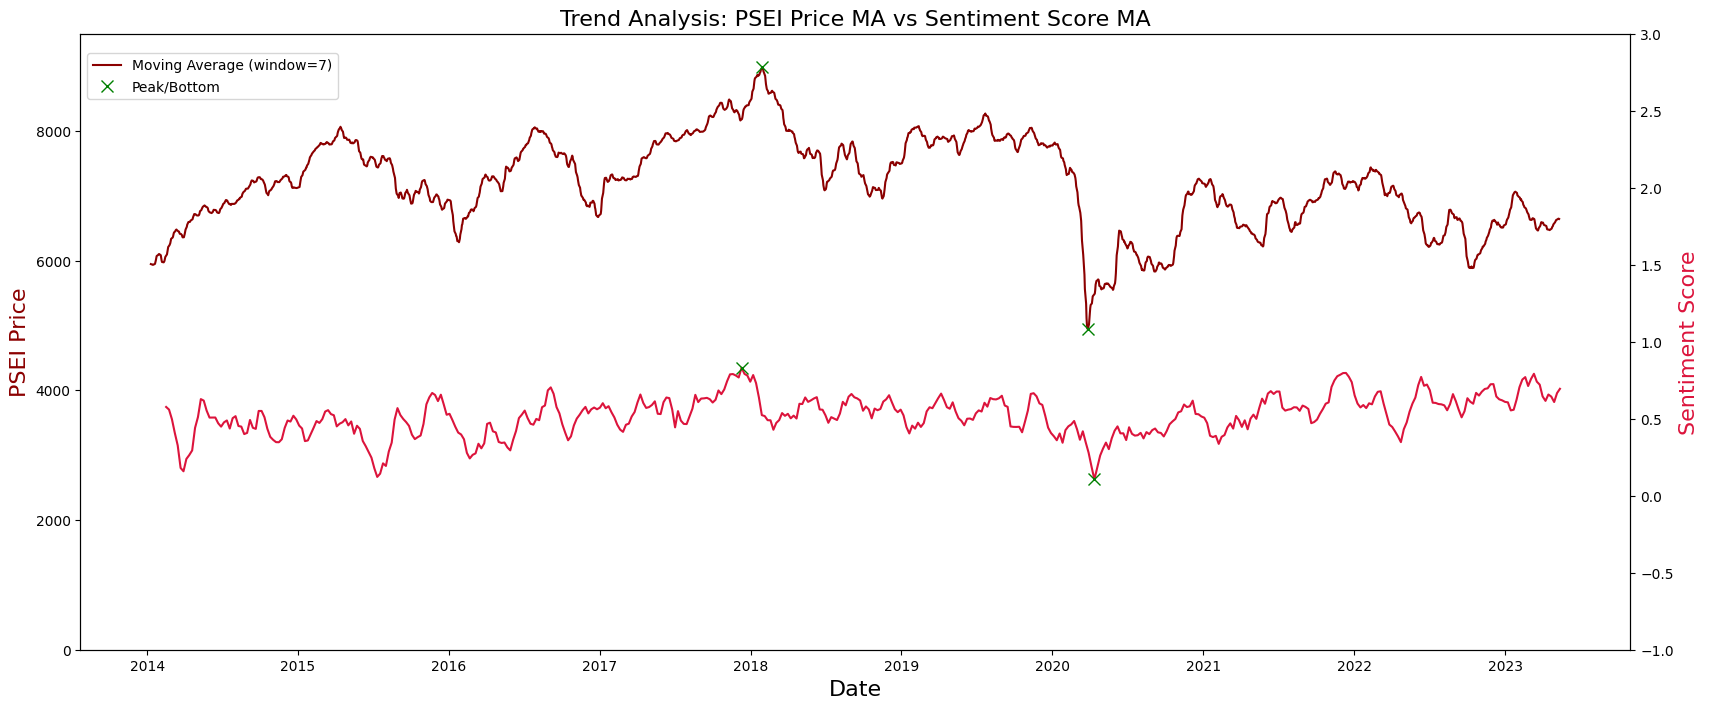

In [ ]:
#Capture peak and bottom data points of the MAs
price_min , ind_price_min = price_ma.min() , price_ma.idxmin()
price_max , ind_price_max = price_ma.max() , price_ma.idxmax()
sent_min , ind_sent_min = sent_ma.min() , sent_ma.idxmin()
sent_max , ind_sent_max = sent_ma.max() , sent_ma.idxmax()

#Plot chart with 2 y-axes
fig, ax1 = plt.subplots(figsize=(20,8))
ax1.plot(price_ma, label='Moving Average (window={})'.format(window_size), color= 'DarkRed')
ax1.plot(ind_price_min , price_min , 'gx' , label='Peak/Bottom', markersize=8)
ax1.plot(ind_price_max , price_max , 'gx' , markersize=8)
ax1.set_xlabel('Date',fontsize=16)
ax1.set_ylabel('PSEI Price',fontsize=16, color= 'DarkRed')
ax1.set_ylim(0, 9500)
ax1.plot()

ax2 = ax1.twinx()
ax2.plot(sent_ma, label='Moving Average (window={})'.format(window_size), color= 'Crimson')
ax2.plot(ind_sent_min , sent_min , 'gx', markersize=8)
ax2.plot(ind_sent_max , sent_max , 'gx', markersize=8)
ax2.set_ylabel('Sentiment Score', fontsize=16, color = 'Crimson')
ax2.set_ylim(-1,3)

ax1.legend(fontsize = 10, loc='upper left', bbox_to_anchor=(0, 0.98))
plt.title('Trend Analysis: PSEI Price MA vs Sentiment Score MA', fontsize=16)
plt.show()

The goal of trend analysis is to understand the underlying patterns and tendencies in the data. The first thing to do is to simply plot the time series data in a line chart and observed the movement and direction of the data.

The use of moving average (MA) filters out the noise in the data, leaving a clearer view of the underlying trend. In the chart above, the moving averages were extracted and compared.
Through observation, we can see coinciding (from left to right) trend of higher lows and higher highs, data point peak, data point bottom, trend of higher lows and higher highs.
Based on the result of the inspection, a hypothesis about PSEI price and sentiment scores can be drawn, hence, a statistical analysis comes next.

Note: Window = number of data points, in this case, 7 days or about a week.

### CORRELATION AND REGRESSION ANALYSIS

Null Hypothesis (H0): There is no significant correlation between stock price and sentiment score.

Alternative Hypothesis (Ha): There is a significant correlation between stock price and sentiment score.

Calculation of correlation coefficient and a regression analysis will be performed to determine if the observed relationship between PSEI price and sentiment score is statistically significant. Based on the results, either reject the null hypothesis in favor of the alternative hypothesis if the relationship is significant or fail to reject the null hypothesis if the relationship is not significant.

Correlation coefficient: 0.10039304045209703
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.958
Date:                Sat, 03 Jun 2023   Prob (F-statistic):             0.0264
Time:                        23:09:24   Log-Likelihood:                -3889.0
No. Observations:                 489   AIC:                             7782.
Df Residuals:                     487   BIC:                             7790.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

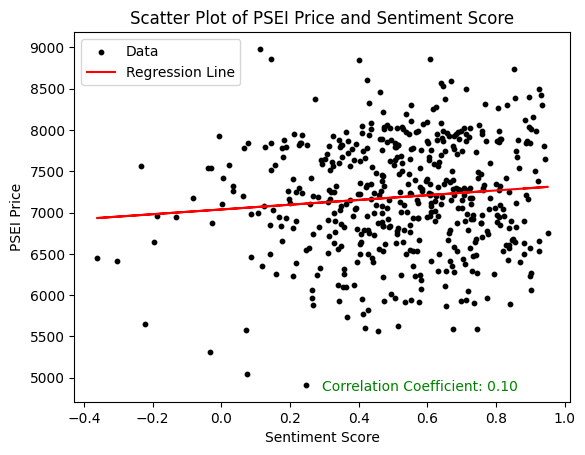

In [ ]:
import statsmodels.api as sm 
#statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, 
# as well as for conducting statistical tests, and statistical data exploration.
df_merged = pd.merge(df_price, df_news, on='Date', how='outer').drop(['Headlines', 'Polarity'], axis=1).sort_values(by='Date')
#I performed an outer merge so that there won't be any discarded data, and to fill the gaps or NaN values in the dataframe, I took their weekly average instead of doing interpolation.
df_corr = df_merged.resample('W').mean().dropna() 


# Calculate correlation coefficient
correlation = df_corr['Sentiment Score'].corr(df_corr['Close'])
print(f"Correlation coefficient: {correlation}") # Display the correlation coefficient

# Define the independent variable (X) and dependent variable (y)
X_reg = df_corr['Sentiment Score'] #sentiment score = independent variable
X_reg = sm.add_constant(X_reg)  # Add a constant term to the independent variable 
                                # This ensures that the linear regression model estimates both the intercept and the slope of the regression line.
y_reg = df_corr['Close'] #PSEI price = dependent variable

# Fit the linear regression model
reg_model = sm.OLS(y_reg, X_reg)
reg_result = reg_model.fit()
print(reg_result.summary()) # Print the regression summary

# Retrieve the coefficients
intercept = reg_result.params[0]
slope = reg_result.params[1]

# Plot the scatter plot with the regression line
plt.scatter(df_corr['Sentiment Score'], df_corr['Close'], label='Data', s=10, color='k')
plt.plot(df_corr['Sentiment Score'], intercept + slope * df_corr['Sentiment Score'], color='r', label='Regression Line') # Plots the regression line
plt.text(0.5, 0.03, f'Correlation Coefficient: {correlation:.2f}', transform=plt.gca().transAxes, color= 'g') # Add correlation coefficient as text in the plot
plt.xlabel('Sentiment Score')
plt.ylabel('PSEI Price')
plt.title('Scatter Plot of PSEI Price and Sentiment Score')
plt.legend(loc='upper left')
plt.show()

Correlation and regression analyses are employed to examine the association between stock price and sentiment score. The correlation coefficient measures the strength and direction of the linear relationship, while the p-value determines the statistical significance of the observed correlation.

The analysis reveals a correlation coefficient of 0.10 between stock price and sentiment score. This positive correlation suggests that an increase in sentiment score is associated with a slight upward movement in stock price. However, the correlation coefficient indicates a weak relationship between the two variables.
Furthermore, the p-value associated with the correlation coefficient is found to be 0.026, which is below the commonly used significance level of 0.05. This implies that the observed correlation is statistically significant, indicating that the relationship between stock price and sentiment score is unlikely to have occurred by chance.

In conclusion, the results reveal a statistically significant, albeit weak, positive correlation between the two variables. These findings suggest that market sentiment, as reflected in the sentiment score, may play a role in stock price movements. In theory the correlation of a stock price and the people's sentiment should be strong but result shows otherwise, this may be explained by the data used for sentiment analysis is relatively unreliable which may be caused by news headlines being brief, hence, a topic for another research.

In [42]:
# It feels satisfying to see the results of the correlation, albeit weak, it still supports the reliability of the original dataset scraped from the web.

#

### ANALYZE PSEI PRICE PERFORMANCE USING SENTIMENTAL AND NUMERICAL ANALYSIS, AND FORECAST PRICE USING MACHINE LEARNING (PART 2)

##### Forecasting using Long Short Term Memory (LSTM) Model

Import Libraries

In [11]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


Preprocess Features

,Close
Date,
2014-01-02,5984.259766
2014-01-03,5947.930176
2014-01-06,5985.810059
2014-01-07,5947.439941
2014-01-08,5986.479980
...,...
2023-05-08,6600.740234
2023-05-09,6622.609863
2023-05-10,6658.589844


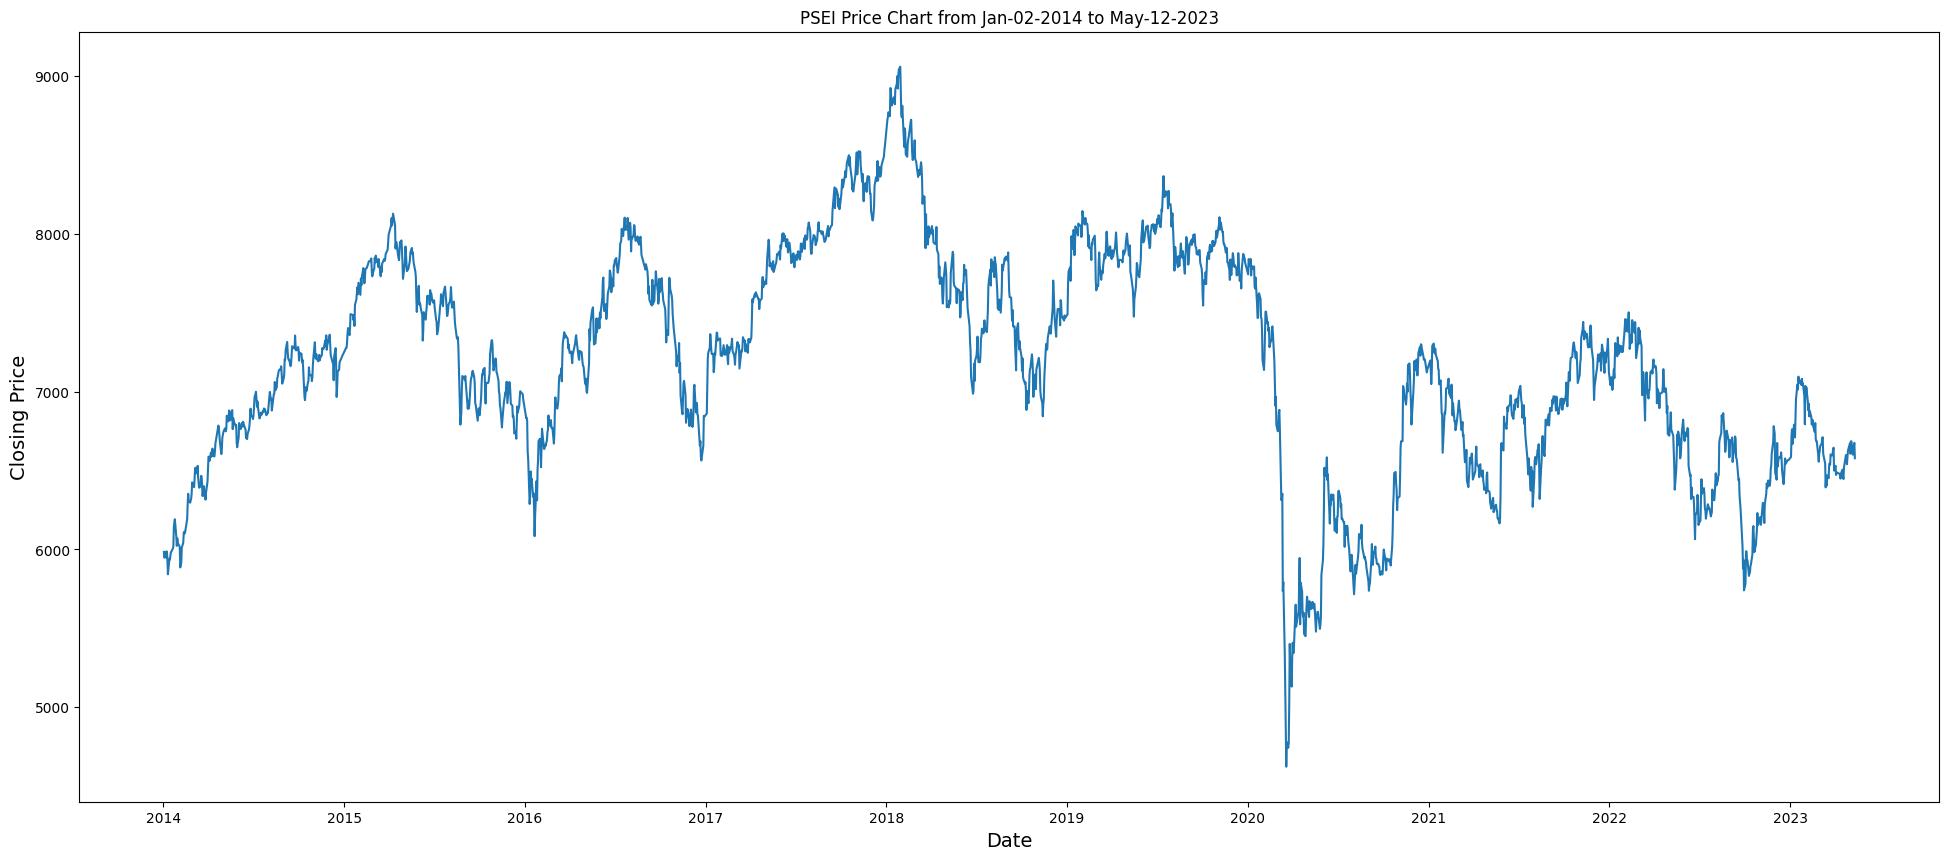

In [2]:
#Import dataset
df_price = pd.read_csv('C:/Users/Jan/Desktop/JAN/GRIP-INTERNSHIP/PSEI-Analysis/PSEI(2014-2023).csv')
#Transform dataset
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price = df_price.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df_price = df_price.dropna().set_index('Date').sort_values(by='Date')
display(df_price)

plt.figure(figsize=(24, 10))
plt.plot(df_price.index, df_price['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.title('PSEI Price Chart from Jan-02-2014 to May-12-2023')
plt.show() 

### Forceasting using LSTM model

Scaled data shape (2280, 1)
Train data start date: 2014-01-02 00:00:00
Train data end date: 2021-01-19 00:00:00
Train data shape (1710, 1)
Test data start date: 2021-01-20 00:00:00
Test data end date: 2023-05-12 00:00:00
Test data shape (570, 1)


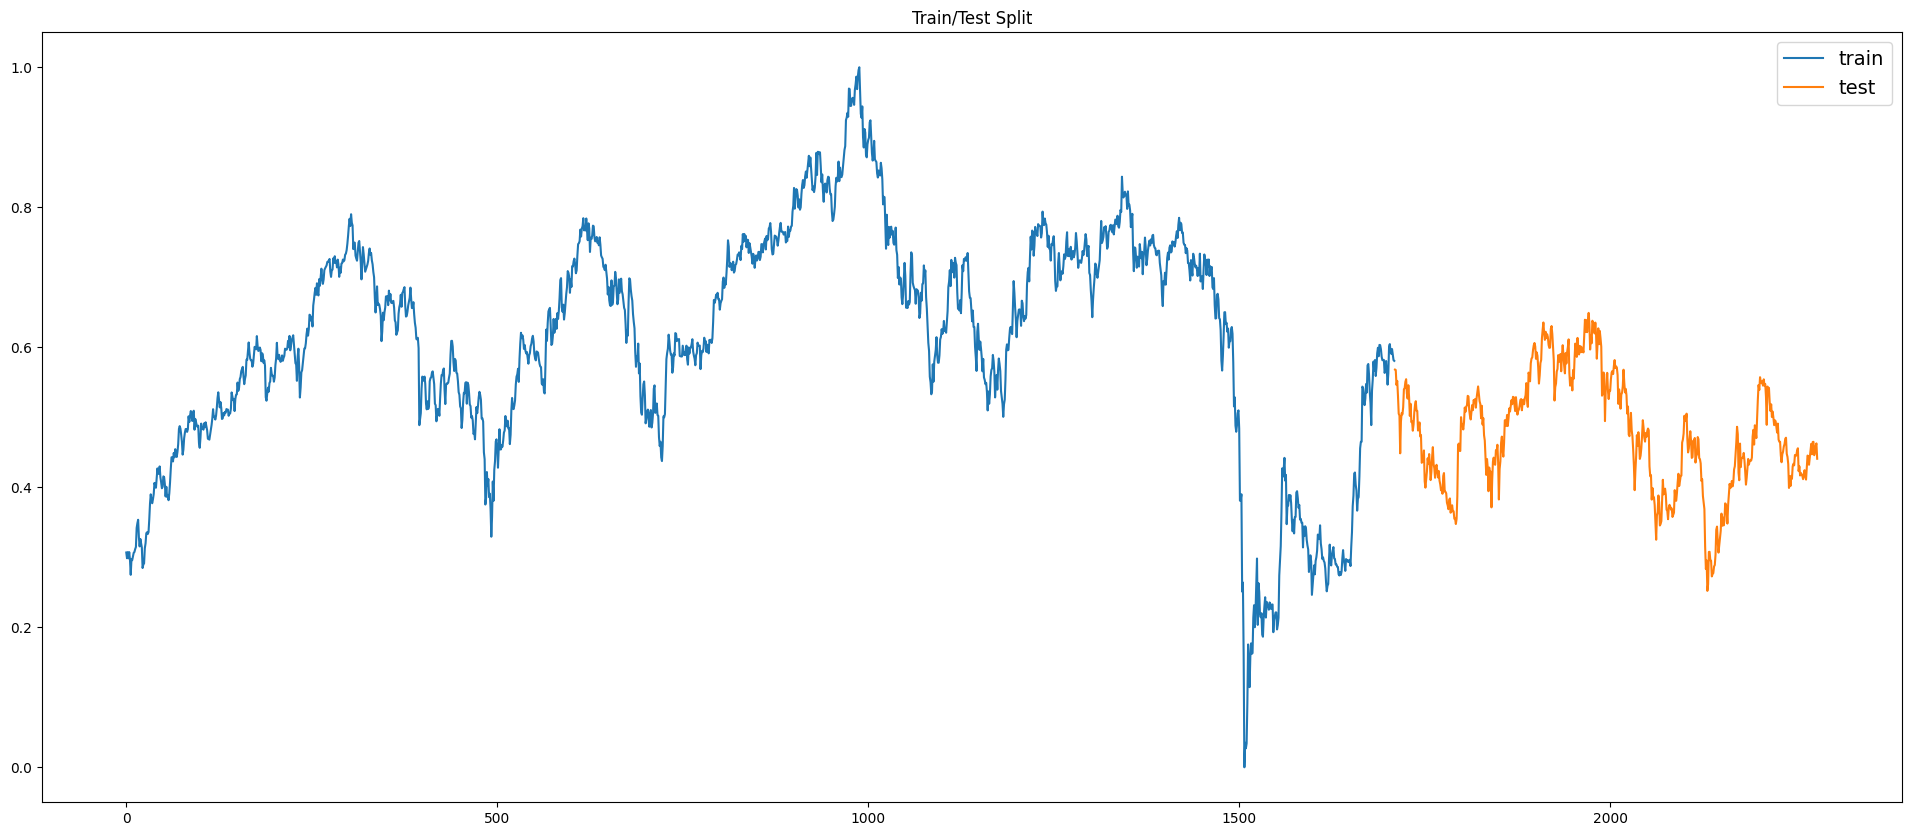

In [3]:
# Preprocess the dataset
data_LSTM = df_price.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_LSTM)
print("Scaled data shape",scaled_data.shape)

# Define the number of time steps to consider
time_steps = 100

# Create the train dataset which is 70% of the original dataset
train_size = int(len(scaled_data) * 0.75)
train_data = scaled_data[0:train_size]
X_train = []
y_train = []
for i in range(time_steps, len(train_data)):
    X_train.append(train_data[i - time_steps:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
x_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # Reshape the input data for LSTM
print("Train data start date:", df_price.index[0])
print("Train data end date:", df_price.index[train_size-1])
print("Train data shape", train_data.shape)

# Create the test dataset 
test_data = scaled_data[train_size:] #test data = unseen data
X_test = []
y_test = []
for i in range(time_steps, len(test_data)):
    X_test.append(test_data[i - time_steps:i, 0])
    y_test.append(test_data[i, 0])
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print("Test data start date:", df_price.index[train_size])
print("Test data end date:", df_price.index[len(df_price)-1])
print("Test data shape", test_data.shape)

test_data_plot = np.empty_like(scaled_data)
test_data_plot[:, :] = np.nan
test_data_plot[len(train_data): , :] = test_data

plt.figure(figsize=(24, 10))
plt.plot(train_data, label='train')
plt.plot(test_data_plot, label='test')
plt.title('Train/Test Split')
plt.legend(fontsize=14)
plt.show()

#### Building and training LSTM machine learning model

In [4]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_LSTM.add(LSTM(50, return_sequences=False))
model_LSTM.add(Dense(25))
model_LSTM.add(Dense(1))
model_LSTM.compile(optimizer='adam', loss='mean_squared_error') # Compiles the model
model_LSTM.fit(X_train, y_train, batch_size=32, epochs=100) # Trains the model

# Perform predictions
predictions_LSTM = model_LSTM.predict(X_test) #produce prediction with equal count agains test data

Epoch 1/200
51/51 [==============================] - 5s 43ms/step - loss: 0.0326
Epoch 2/200
51/51 [==============================] - 2s 44ms/step - loss: 0.0025
Epoch 3/200
51/51 [==============================] - 2s 44ms/step - loss: 0.0018
Epoch 4/200
51/51 [==============================] - 2s 44ms/step - loss: 0.0017
Epoch 5/200
51/51 [==============================] - 2s 43ms/step - loss: 0.0016
Epoch 6/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0014
Epoch 7/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0013
Epoch 8/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0014
Epoch 9/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0014
Epoch 10/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0012
Epoch 11/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0011
Epoch 12/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0011
Epoch 13/200
51/51 [=====

In [5]:
# Check Accuracy of the model
mse = mean_squared_error(predictions_LSTM, y_test)
print('The mean squeted error:',mse)
accuracy = 100 - mse
print(f"Accuracy: {accuracy}%")

The mean squeted error: 0.0003448186998958818
Accuracy: 99.9996551813001%


In [6]:
predictions_LSTM = scaler.inverse_transform(predictions_LSTM) 

# Display the predictions
for i in range(len(predictions_LSTM)):
    print(f"Day {i+1}: Predicted Price = {predictions_LSTM[i][0]}")

Day 1: Predicted Price = 6983.8251953125
Day 2: Predicted Price = 6897.87060546875
Day 3: Predicted Price = 6859.11083984375
Day 4: Predicted Price = 6834.10009765625
Day 5: Predicted Price = 6879.8056640625
Day 6: Predicted Price = 6931.13720703125
Day 7: Predicted Price = 6900.1806640625
Day 8: Predicted Price = 6963.82763671875
Day 9: Predicted Price = 6948.888671875
Day 10: Predicted Price = 6966.33935546875
Day 11: Predicted Price = 6908.87451171875
Day 12: Predicted Price = 6970.13623046875
Day 13: Predicted Price = 7007.98828125
Day 14: Predicted Price = 7043.2939453125
Day 15: Predicted Price = 6998.138671875
Day 16: Predicted Price = 6947.166015625
Day 17: Predicted Price = 6927.5400390625
Day 18: Predicted Price = 6837.068359375
Day 19: Predicted Price = 6918.388671875
Day 20: Predicted Price = 6801.140625
Day 21: Predicted Price = 6843.1591796875
Day 22: Predicted Price = 6735.5205078125
Day 23: Predicted Price = 6700.6064453125
Day 24: Predicted Price = 6593.44482421875
Day

In [7]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 25ms/step
Check:
Predicted Price at May-12-2023 = 6590.84375
Actual Price at May-12-2023 = 6578.149902
Test data start date: 2021-01-20 00:00:00
Test data end date: 2023-05-12 00:00:00
Test data shape (570, 1)


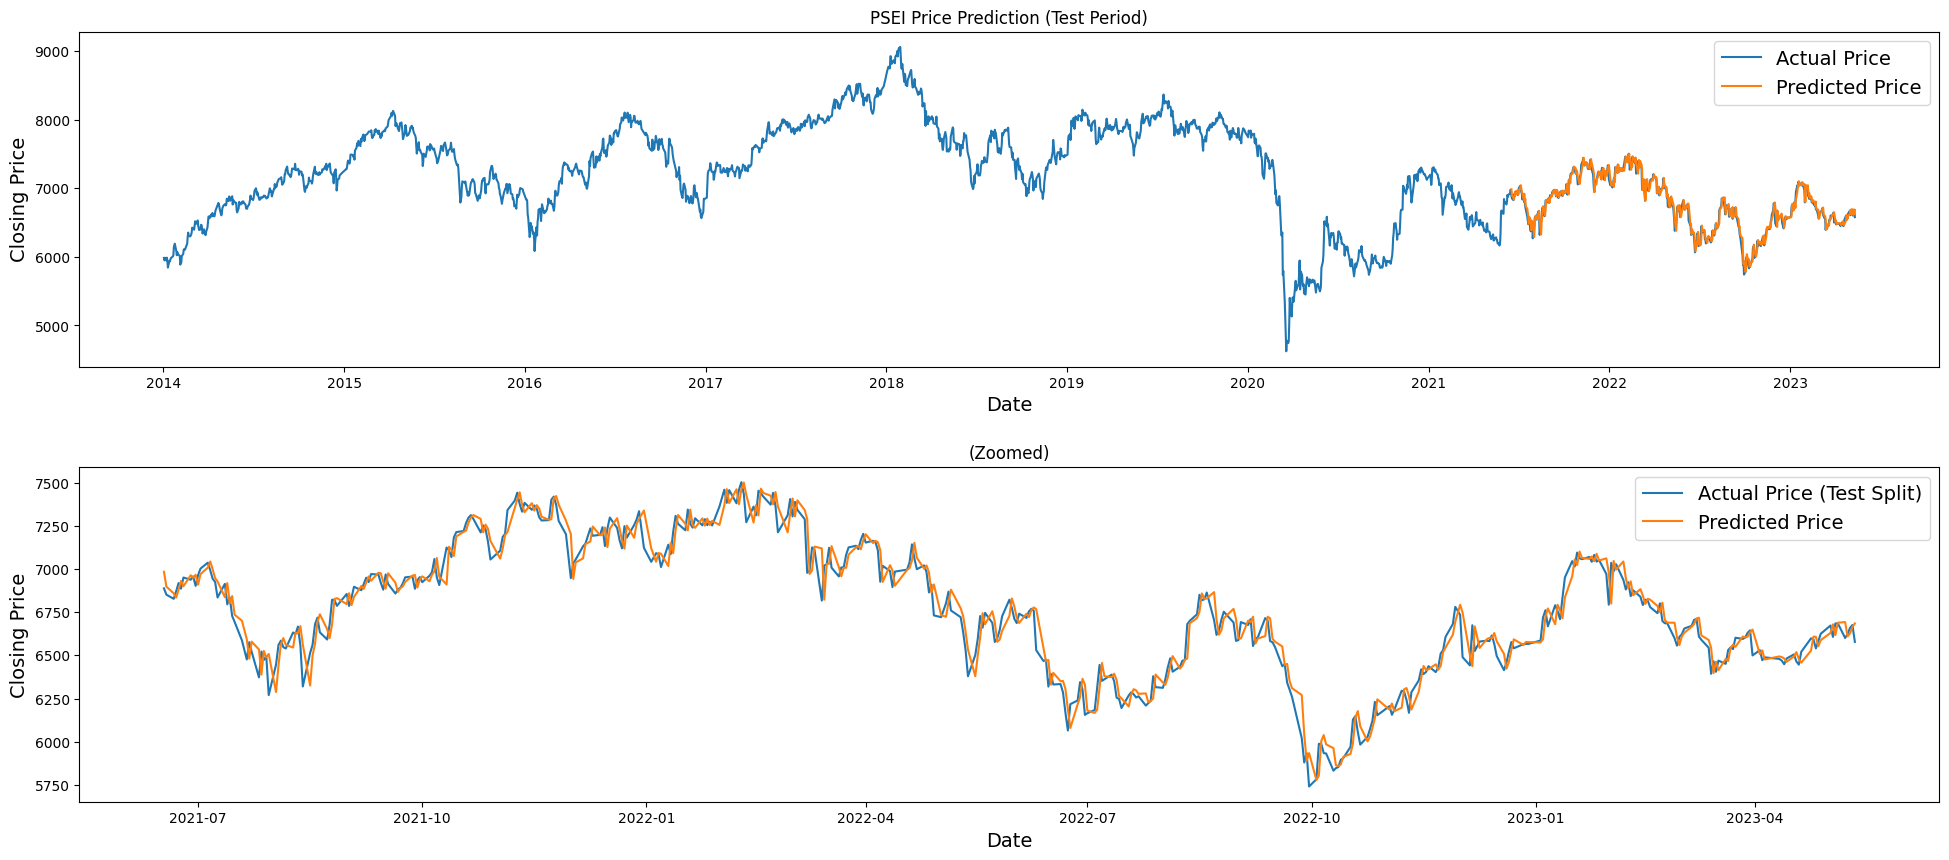

In [8]:
# Compare the recent predicted and actual price
recent_data = df_price[-time_steps:]
recent_prices = recent_data['Close'].values.reshape(-1, 1)
scaled_recent_prices = scaler.transform(recent_prices)
x_recent = np.array([scaled_recent_prices])
x_recent = np.reshape(x_recent, (x_recent.shape[0], x_recent.shape[1], 1))
recent_predictions = model_LSTM.predict(x_recent)
recent_predictions = scaler.inverse_transform(recent_predictions)
print(f"Check:")
print(f"Predicted Price at May-12-2023 = {recent_predictions[0][0]}")
print(f"Actual Price at May-12-2023 = {recent_prices[-1][0]}")
print("Test data start date:", df_price.index[train_size])
print("Test data end date:", df_price.index[len(df_price)-1])
print("Test data shape", test_data.shape)

# Inverse transform y_test
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(24, 10))
plt.subplot(2, 1, 1)
plt.plot(df_price.index, df_price['Close'], label='Actual Price')
plt.plot(df_price.index[-len(predictions_LSTM):], predictions_LSTM, label='Predicted Price')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.title('PSEI Price Prediction (Test Period)')
plt.legend(fontsize=14)
plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 1, 2)
plt.plot(df_price.index[-len(predictions_LSTM):], y_test_inverse[:len(predictions_LSTM)], label='Actual Price (Test Split)')
plt.plot(df_price.index[-len(predictions_LSTM):], predictions_LSTM, label='Predicted Price')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.title('(Zoomed)')
plt.legend(fontsize=14)
plt.show()

This chart shows that after training our train data in LSTM machine learning model, it produced a "Predicted Price" data array with count equal to the test data, which we compared side by side with the actual price data's test split.

1/1 [==============================] - 0s 22ms/step
Day 1 after May-12-2023: Predicted Price = 6590.84375
Day 2 after May-12-2023: Predicted Price = 6597.96630859375
Day 3 after May-12-2023: Predicted Price = 6605.89404296875
Day 4 after May-12-2023: Predicted Price = 6616.2216796875
Day 5 after May-12-2023: Predicted Price = 6627.8251953125
Day 6 after May-12-2023: Predicted Price = 6639.6435546875
Day 7 after May-12-2023: Predicted Price = 6650.966796875
Day 8 after May-12-2023: Predicted Price = 6661.4208984375
Day 9 after May-12-2023: Predicted Price = 6670.8974609375
Day 10 after May-12-2023: Predicted Price = 6679.47265625
Day 11 after May-12-2023: Predicted Price = 6687.3232421875
Day 12 after May-12-2023: Predicted Price = 6694.669921875
Day 13 after May-12-2023: Predicted Price = 6701.7236328125
Day 14 after May-12-2023: Predicted Price = 6708.6611328125
Day 15 after May-12-2023: Predicted Price = 6715.61376953125
Day 16 after May-12-2023: Predicted Price = 6722.66015625
Day 1

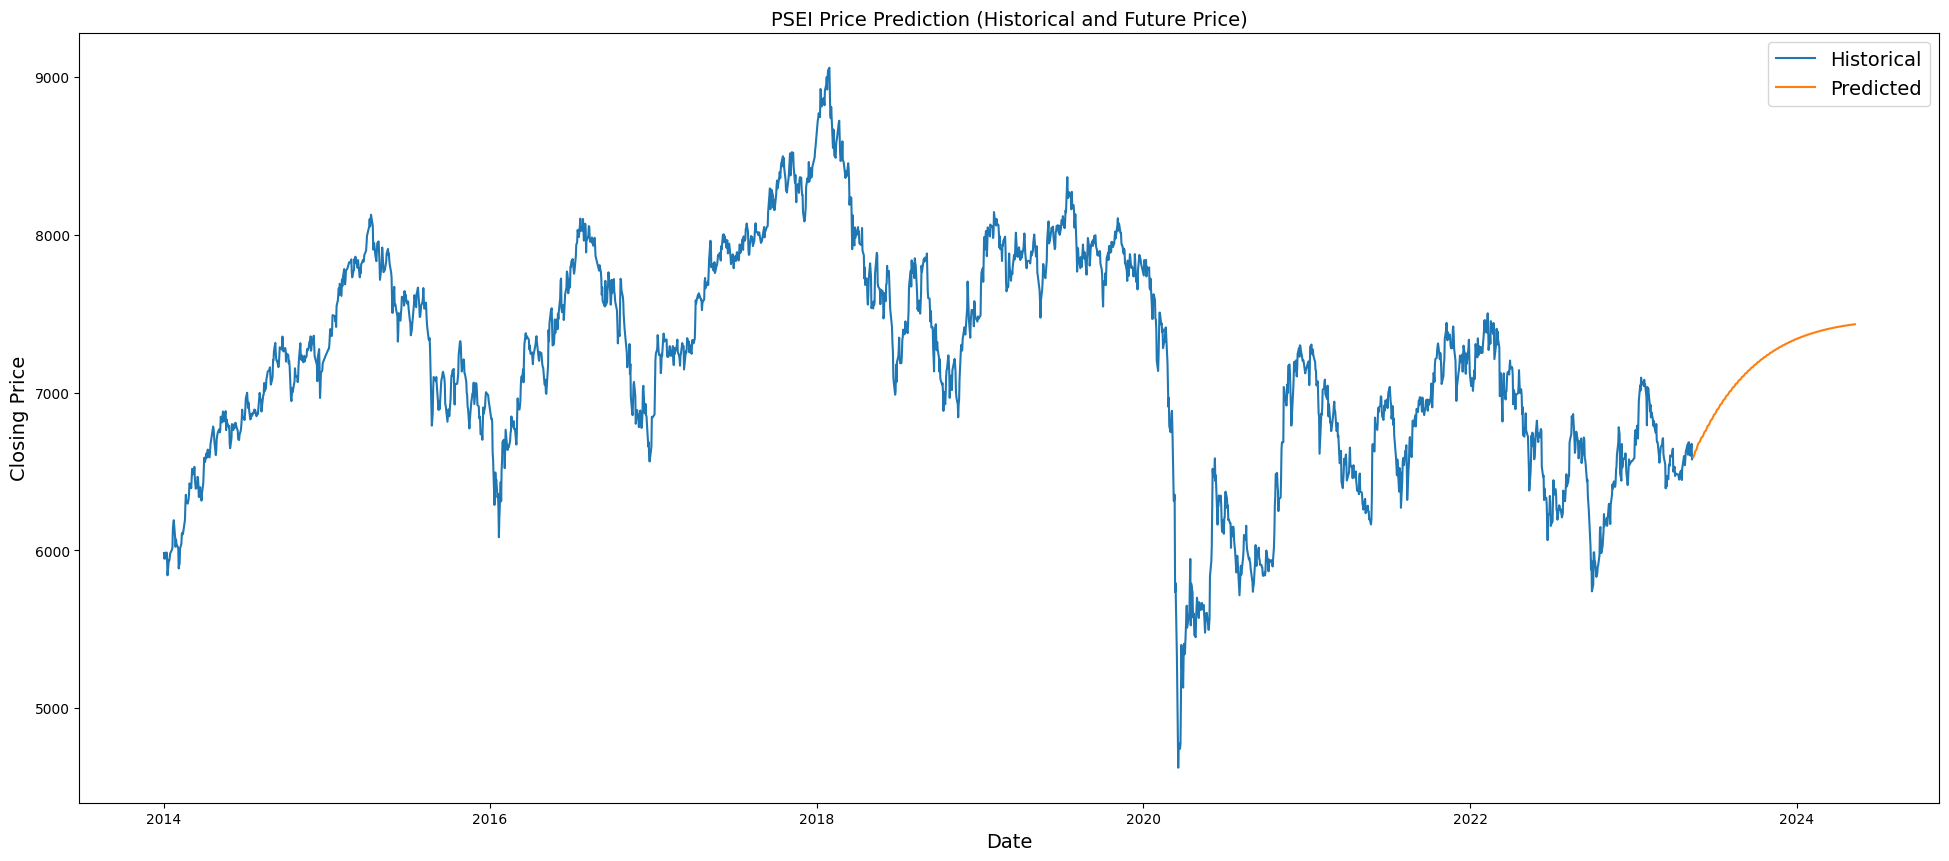

In [ ]:
# input number of days to predict
# n_prediction = int(input("Enter the number of days for prediction: "))
n_prediction = 260

# Get the latest data for prediction
latest_data = scaled_data[-time_steps:]
x_latest = np.array([latest_data])
x_latest = np.reshape(x_latest, (x_latest.shape[0], x_latest.shape[1], 1))

# Perform future predictions
future_predictions = []
for _ in range(n_prediction):
    prediction = model_LSTM.predict(x_latest)
    future_predictions.append(prediction[0][0])
    x_latest = np.append(x_latest[:, 1:, :], np.reshape(prediction, (1, 1, 1)), axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Combine historical data with predicted future prices
combined_dates = np.append(df_price.index.values[-time_steps:], pd.bdate_range(start=df_price.index.values[-1], periods=n_prediction+1)[1:])
combined_prices = np.append(data_LSTM[-time_steps:].flatten(), future_predictions.flatten())

# Display the predictions
for i in range(n_prediction):
    print(f"Day {i+1} after May-12-2023: Predicted Price = {future_predictions[i][0]}")
    
plt.figure(figsize=(24, 10))
plt.plot(df_price.index, data_LSTM, label='Historical')
plt.plot(combined_dates[-n_prediction:], combined_prices[-n_prediction:], label='Predicted')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.title('PSEI Price Prediction (Historical and Future Price)', fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [12]:
# Store forecast data into a dataframe for later use
df_forecast_lstm = pd.DataFrame({'Date': combined_dates, 'Close': combined_prices})
df_forecast_lstm = df_forecast_lstm.tail(260)
display(df_forecast_lstm)

,Date,Close
100,2023-05-15,6590.843750
101,2023-05-16,6597.966309
102,2023-05-17,6605.894043
103,2023-05-18,6616.221680
104,2023-05-19,6627.825195
...,...,...
355,2024-05-06,7431.323242
356,2024-05-07,7431.868652
357,2024-05-08,7432.406250
358,2024-05-09,7432.936523


### Forecasting using Autoregressive Integrated Moving Average (ARIMA) Model 

In [1]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Stationarity test using Augmented Dickey-Fuller(ADF) test
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df_price['Close'])

# Print the results
print("ADF Statistic:", ADF_result[0])
print("p-value:", ADF_result[1])
print("Critical Values:")
for key, value in ADF_result[4].items():
    print("\t{}: {}".format(key, value))

ADF Statistic: -2.948921315061189
p-value: 0.039947732001244046
Critical Values:
	1%: -3.4332289345062725
	5%: -2.86281184241882
	10%: -2.567447060364226


Interpretation: The sample is stationary.

##### Get ARIMA Parameters p, d, q

In [5]:
from pmdarima.arima.utils import ndiffs
# d = degree of differenceing, the number of times that the raw observations are differenced
ndiff = ndiffs(df_price.Close)
print('d value is:', ndiff)

d value is: 1


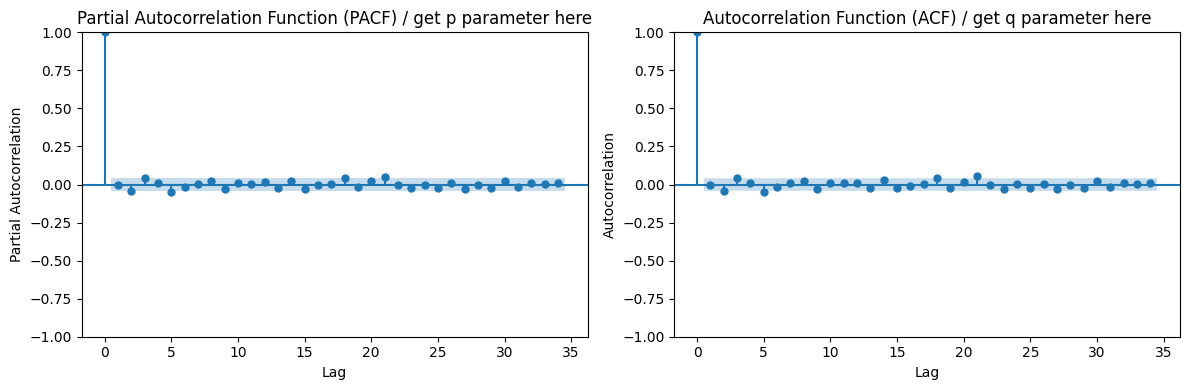

In [6]:
# GET PARAMETERS THROUGH VISUAL INSPECTION
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

diff = df_price.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# Plot PACF
plot_pacf(diff, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Partial Autocorrelation')
ax1.set_title('Partial Autocorrelation Function (PACF) / get p parameter here')
# Plot ACF
plot_acf(diff, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Autocorrelation')
ax2.set_title('Autocorrelation Function (ACF) / get q parameter here')
plt.tight_layout()
plt.show()

p = lag order, the number of lag observations included in the model.
d = degree of differenceing, the number of times that the raw observations are differenced.
q = order of moving average, the size of the moving average window.

If the spike in the lag is at lag zero (i.e., the first data point itself), it suggests a strong autocorrelation at lag 1 and indicates the presence of a trend or a unit root in the time series data. In such cases, an autoregressive (AR) component in the ARIMA model can capture the trend.

When the spike is at lag zero, it means that the current value of the time series is highly correlated with its immediate preceding value. This suggests that the time series has a strong persistence or memory from one observation to the next. Considering the spike at lag zero, a reasonable choice would be to modify the order parameter to (p, q) = (1, 0). This means including an autoregressive component of order 1 (AR(1)) and no moving average component. Including an AR(1) component will account for the autocorrelation at lag 1, capturing the trend and the dependency of the current value on the immediate preceding value.
Hence, (1, 0, 0)

In [7]:
# Build and train the model
data_ARIMA = df_price['Close'].values
model_ARIMA = (ARIMA(data_ARIMA, order=(1, 0, 1)))
model_fit = model_ARIMA.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2280
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -13253.434
Date:                Mon, 05 Jun 2023   AIC                          26514.868
Time:                        06:16:14   BIC                          26537.796
Sample:                             0   HQIC                         26523.231
                               - 2280                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7189.6603    242.727     29.620      0.000    6713.924    7665.396
ar.L1          0.9935      0.002    455.361      0.000       0.989       0.998
ma.L1          0.0028      0.014      0.195      0.8

In [8]:
# Forecast price until May 2024
forecast_ARIMA = model_fit.forecast(steps=260)

In [17]:
# Create dataframe to store the model's prediction for later use
last_date = df_price.index[-1]
future_dates = pd.bdate_range(start=last_date + pd.DateOffset(days=1), periods=260)
df_forecast_arima = pd.DataFrame()
df_forecast_arima['Date'] = future_dates
df_forecast_arima['Close'] = forecast_ARIMA
display(df_forecast_arima)

,Date,Close
0,2023-05-15,6581.841660
1,2023-05-16,6585.793555
2,2023-05-17,6589.719755
3,2023-05-18,6593.620427
4,2023-05-19,6597.495739
...,...,...
255,2024-05-06,7074.478350
256,2024-05-07,7075.227236
257,2024-05-08,7075.971253
258,2024-05-09,7076.710433


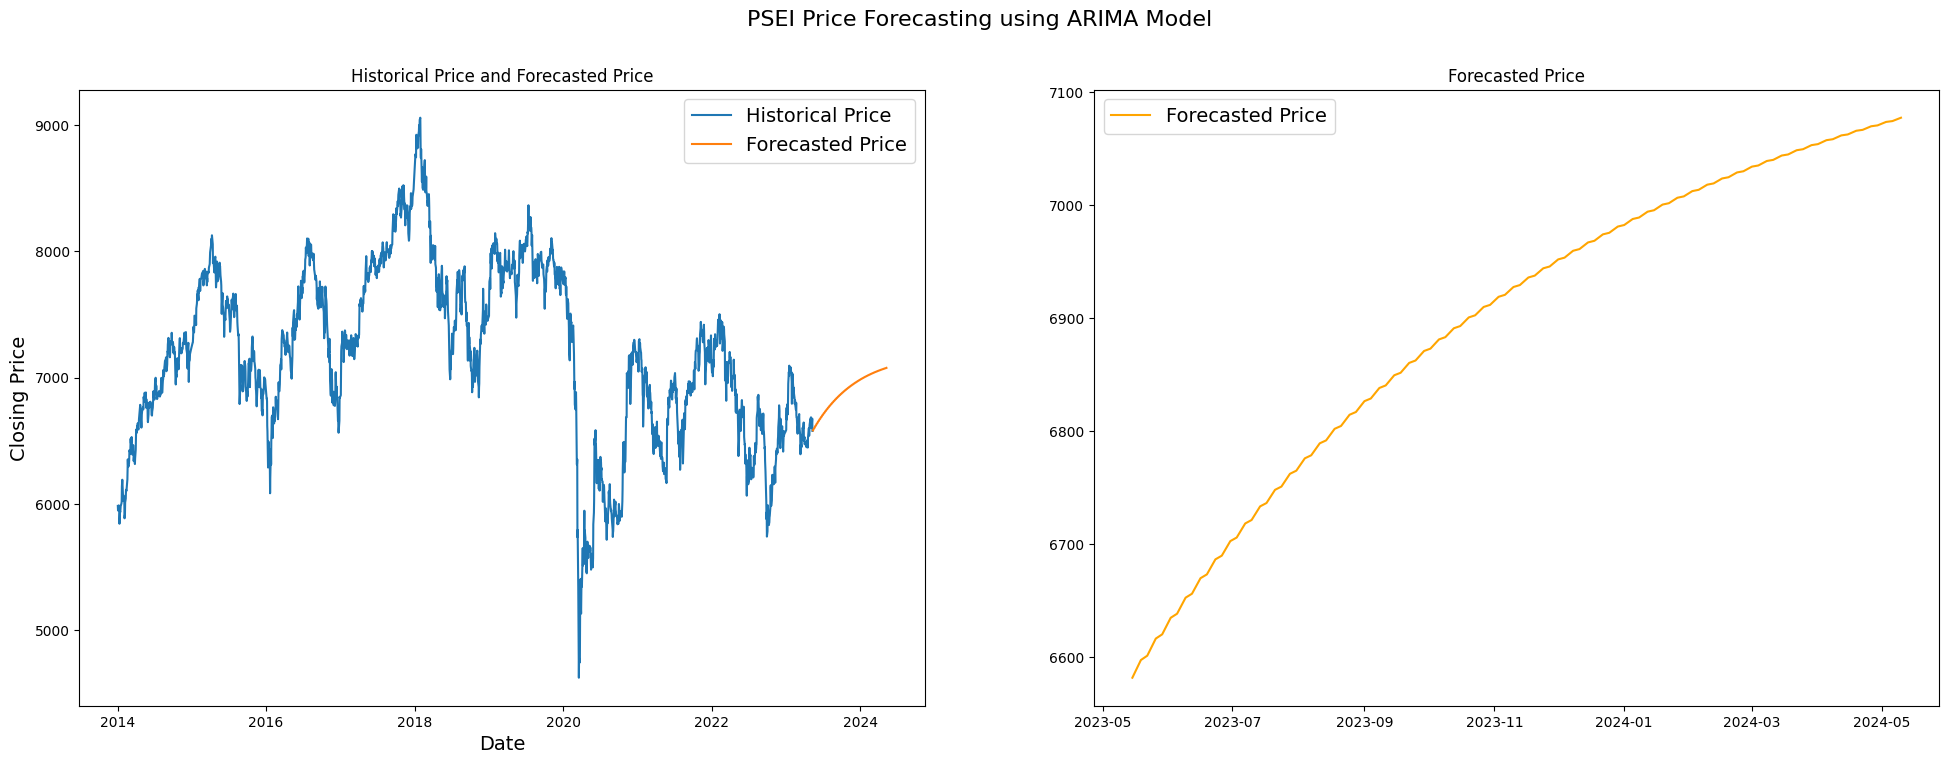

In [10]:
# Visualize results
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(df_price.index, df_price['Close'], label = 'Historical Price')
plt.plot(df_forecast_arima['Date'], df_forecast_arima['Close'], label = 'Forecasted Price')
plt.title('Historical Price and Forecasted Price')
plt.legend(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.subplot(1, 2, 2)
plt.plot(future_dates, forecast_ARIMA, color='orange' ,label = 'Forecasted Price')
plt.title('Forecasted Price')
plt.legend(fontsize=14)
plt.suptitle('PSEI Price Forecasting using ARIMA Model', fontsize=16)
plt.show()

### Forecasting using Prophet Model

In [11]:
# Import libraries
from prophet import Prophet

# Feature engineering
df_prophet = df_price.reset_index()
df_prophet.columns = ['ds', 'y']

# Train model
model_Prophet = Prophet(daily_seasonality=True, interval_width=0.8)
model_Prophet.fit(df_prophet)

06:17:03 - cmdstanpy - INFO - Chain [1] start processing
06:17:05 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2014-01-02,6005.063694,5685.270658,6350.357801
1,2014-01-03,6019.358572,5695.930790,6356.525696
2,2014-01-06,6069.289652,5720.713578,6415.006546
3,2014-01-07,6085.558766,5736.511233,6443.322779
4,2014-01-08,6106.765813,5746.152363,6437.556568
...,...,...,...,...
2535,2024-05-06,6109.648197,4129.182816,7787.701587
2536,2024-05-07,6103.244658,4099.701578,7760.590835
2537,2024-05-08,6102.751541,4070.341831,7874.350381
2538,2024-05-09,6098.995707,4019.701151,7895.824520


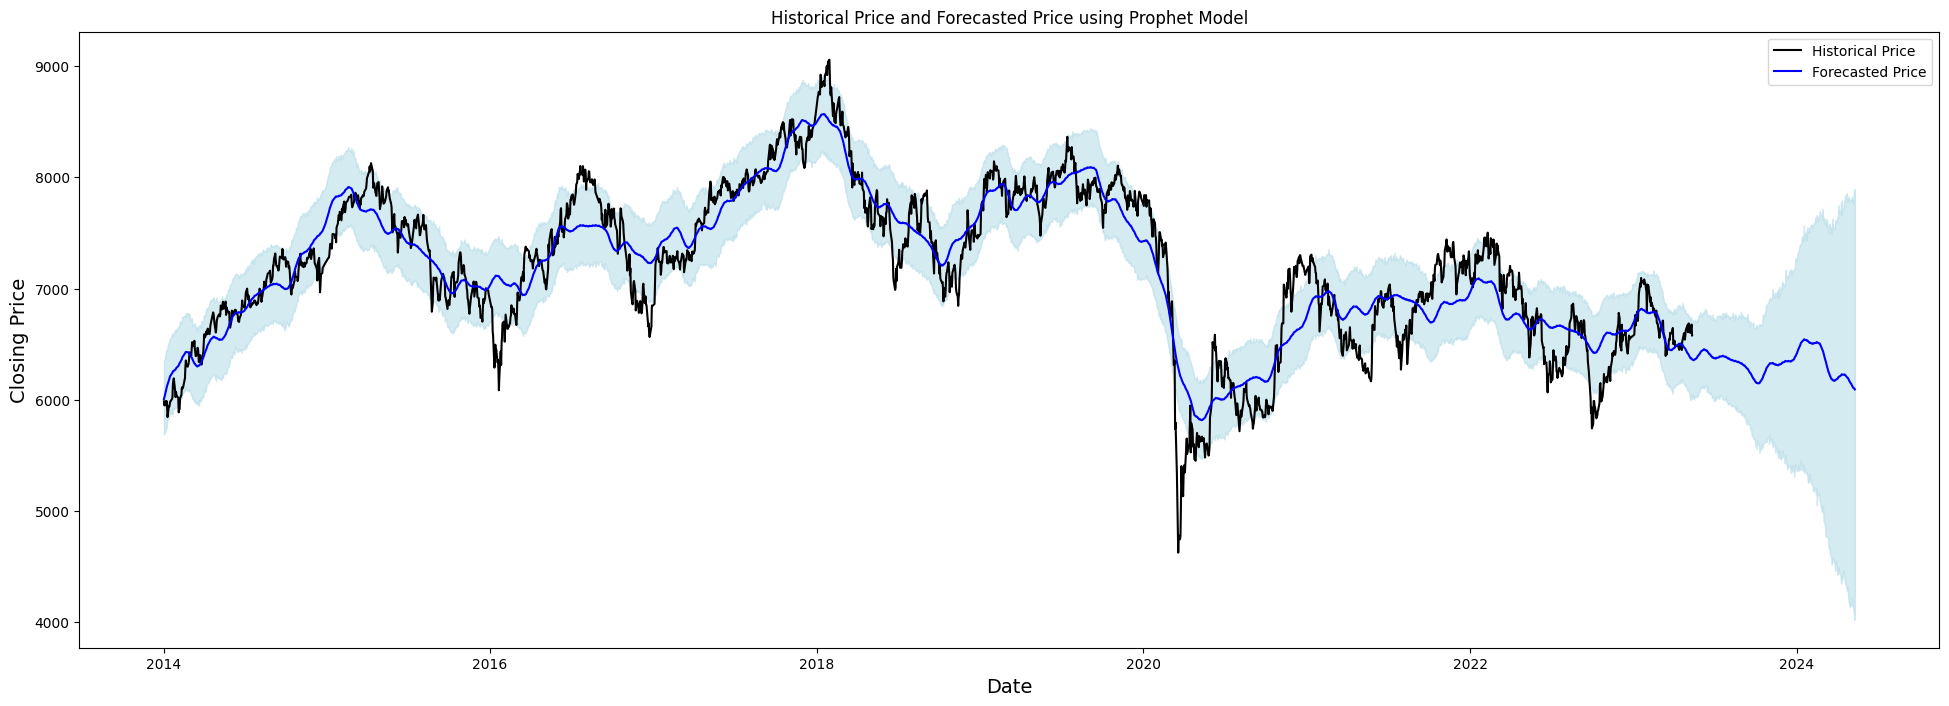

In [14]:
future_dates = model_Prophet.make_future_dataframe(periods=365)
future_dates = future_dates[future_dates['ds'].dt.weekday < 5]
prophet_forecast  = model_Prophet.predict(future_dates)
display(prophet_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Visualize the forecast
plt.figure(figsize=(24, 8))
plt.plot(df_price.index, df_price['Close'], color='black', label='Historical Price')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], color='blue', label='Forecasted Price')
plt.fill_between(prophet_forecast['ds'], prophet_forecast['yhat_lower'], prophet_forecast['yhat_upper'], color='lightblue', alpha=0.5)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.legend()
plt.title('Historical Price and Forecasted Price using Prophet Model')
plt.show() 

In [ ]:
# Store the forecast data in dataframe for later use
df_forecast_prophet = pd.DataFrame()
df_forecast_prophet['Date'] = prophet_forecast['ds']
df_forecast_prophet['yhat'] = prophet_forecast['yhat']
df_forecast_prophet['yhat_lower'] = prophet_forecast['yhat_lower']
df_forecast_prophet['yhat_upper'] = prophet_forecast['yhat_upper']
display(df_forecast_prophet)

,Date,yhat,yhat_lower,yhat_upper
0,2014-01-02,6005.063694,5683.160905,6358.846514
1,2014-01-03,6019.358572,5675.645897,6366.846218
2,2014-01-06,6069.289652,5711.998686,6397.245077
3,2014-01-07,6085.558766,5747.005387,6452.769554
4,2014-01-08,6106.765813,5770.558576,6450.210296
...,...,...,...,...
2535,2024-05-06,6109.648197,4293.007053,8048.420111
2536,2024-05-07,6103.244658,4272.730464,8142.455785
2537,2024-05-08,6102.751541,4092.098896,8120.433684
2538,2024-05-09,6098.995707,4189.194896,8029.575645


### Forecasting using Extreme Gradient Boosting (XGBoost) Regressor Model

In [25]:
# Import Library
import xgboost as xgb

Preprocess Features

Using data from previous models.

In [21]:
#Transform dataset
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price = df_price.drop(['High', 'Low', 'Adj Close', 'Open', 'Volume'], axis=1)
df_price = df_price.dropna().set_index('Date').sort_values(by='Date')
df_forecast_arima = df_forecast_arima.set_index('Date').rename(columns={'Close': 'ARIMA'})

# For this experiment, I'll populate the null values of ARIMA column by...
df_price['ARIMA'] = df_price.Close.shift(-1) # Shift -1 is also like Lag = 1, based on ARIMA model hyperparameters
df_price['ARIMA'].fillna(df_price['Close'], inplace=True)
df_merged_xgb = pd.concat([df_price, df_forecast_arima])
df_merged_xgb = pd.merge(df_merged_xgb, df_forecast_prophet, on='Date', how='outer').set_index('Date').sort_values(by='Date')
display(df_merged_xgb)

,Close,ARIMA,yhat,yhat_lower,yhat_upper
Date,,,,,
2014-01-02,5984.259766,5947.930176,6005.063694,5654.734536,6324.295683
2014-01-03,5947.930176,5985.810059,6019.358572,5678.615063,6377.840517
2014-01-06,5985.810059,5947.439941,6069.289652,5719.329921,6417.028110
2014-01-07,5947.439941,5986.479980,6085.558766,5758.112489,6427.594568
2014-01-08,5986.479980,5937.509766,6106.765813,5760.711719,6425.892438
...,...,...,...,...,...
2024-05-06,NaN,7074.478350,6109.648197,4174.113305,8005.850510
2024-05-07,NaN,7075.227236,6103.244658,4140.824705,8031.686071
2024-05-08,NaN,7075.971253,6102.751541,4294.808336,8058.391769


In [22]:
# Select data from 2014 to 2023 to build and train the model
df_xgb_train = df_merged_xgb.head(2280)
display(df_xgb_train)

# Use this data to predict the price for the future period (May 2023 - May 2024)
df_xgb_forecast = df_merged_xgb.tail(260)
display(df_xgb_forecast)

,Close,ARIMA,yhat,yhat_lower,yhat_upper
Date,,,,,
2014-01-02,5984.259766,5947.930176,6005.063694,5654.734536,6324.295683
2014-01-03,5947.930176,5985.810059,6019.358572,5678.615063,6377.840517
2014-01-06,5985.810059,5947.439941,6069.289652,5719.329921,6417.028110
2014-01-07,5947.439941,5986.479980,6085.558766,5758.112489,6427.594568
2014-01-08,5986.479980,5937.509766,6106.765813,5760.711719,6425.892438
...,...,...,...,...,...
2023-05-08,6600.740234,6622.609863,6376.806793,6026.357591,6710.436272
2023-05-09,6622.609863,6658.589844,6371.081501,6041.234166,6712.690080
2023-05-10,6658.589844,6675.459961,6371.348861,6018.924832,6729.461728


,Close,ARIMA,yhat,yhat_lower,yhat_upper
Date,,,,,
2023-05-15,NaN,6581.841660,6355.619044,5995.787554,6713.370209
2023-05-16,NaN,6585.793555,6355.098554,6000.288847,6699.220767
2023-05-17,NaN,6589.719755,6360.768287,6005.890895,6685.831840
2023-05-18,NaN,6593.620427,6363.370239,6028.589258,6701.063831
2023-05-19,NaN,6597.495739,6362.791237,6005.904091,6705.808828
...,...,...,...,...,...
2024-05-06,NaN,7074.478350,6109.648197,4174.113305,8005.850510
2024-05-07,NaN,7075.227236,6103.244658,4140.824705,8031.686071
2024-05-08,NaN,7075.971253,6102.751541,4294.808336,8058.391769


Select features to train

In [23]:
train_data = df_xgb_train.iloc[:int(.80*len(df_price)), :]
test_data = df_xgb_train.iloc[int(.80*len(df_price)):, :]
print(train_data.shape , test_data.shape)

features = ['yhat','yhat_lower','yhat_upper', 'ARIMA']
target = 'Close'

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
display(X_test)

(1824, 5) (456, 5)
(1824, 4) (1824,) (456, 4) (456,)


,yhat,yhat_lower,yhat_upper,ARIMA
Date,,,,
2021-07-07,6927.097225,6607.551169,7293.607346,6924.990234
2021-07-08,6929.741169,6587.513160,7259.802968,6834.919922
2021-07-09,6928.561314,6573.067261,7292.550915,6913.870117
2021-07-12,6932.154506,6596.671106,7271.134983,6795.129883
2021-07-13,6933.238233,6603.917240,7293.715215,6835.410156
...,...,...,...,...
2023-05-08,6376.806793,6026.357591,6710.436272,6622.609863
2023-05-09,6371.081501,6041.234166,6712.690080,6658.589844
2023-05-10,6371.348861,6018.924832,6729.461728,6675.459961


#### Build and train model

In [26]:
# Build and train model
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', n_estimators=1000, early_stopping_rounds = 50, objective='reg:linear', max_depth=3, learning_rate=0.01)
model.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=50)

[06:43:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6699.91869
[50]	validation_0-rmse:4046.04052
[100]	validation_0-rmse:2445.23700
[150]	validation_0-rmse:1478.02030
[200]	validation_0-rmse:893.94190
[250]	validation_0-rmse:542.49539
[300]	validation_0-rmse:333.48065
[350]	validation_0-rmse:211.32083
[400]	validation_0-rmse:143.69925
[450]	validation_0-rmse:109.29029
[500]	validation_0-rmse:93.96800
[550]	validation_0-rmse:88.00096
[600]	validation_0-rmse:85.93079
[650]	validation_0-rmse:85.22838
[700]	validation_0-rmse:85.06285
[750]	validation_0-rmse:85.07733
[759]	validation_0-rmse:85.10802


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

Accuracy: 94.98%


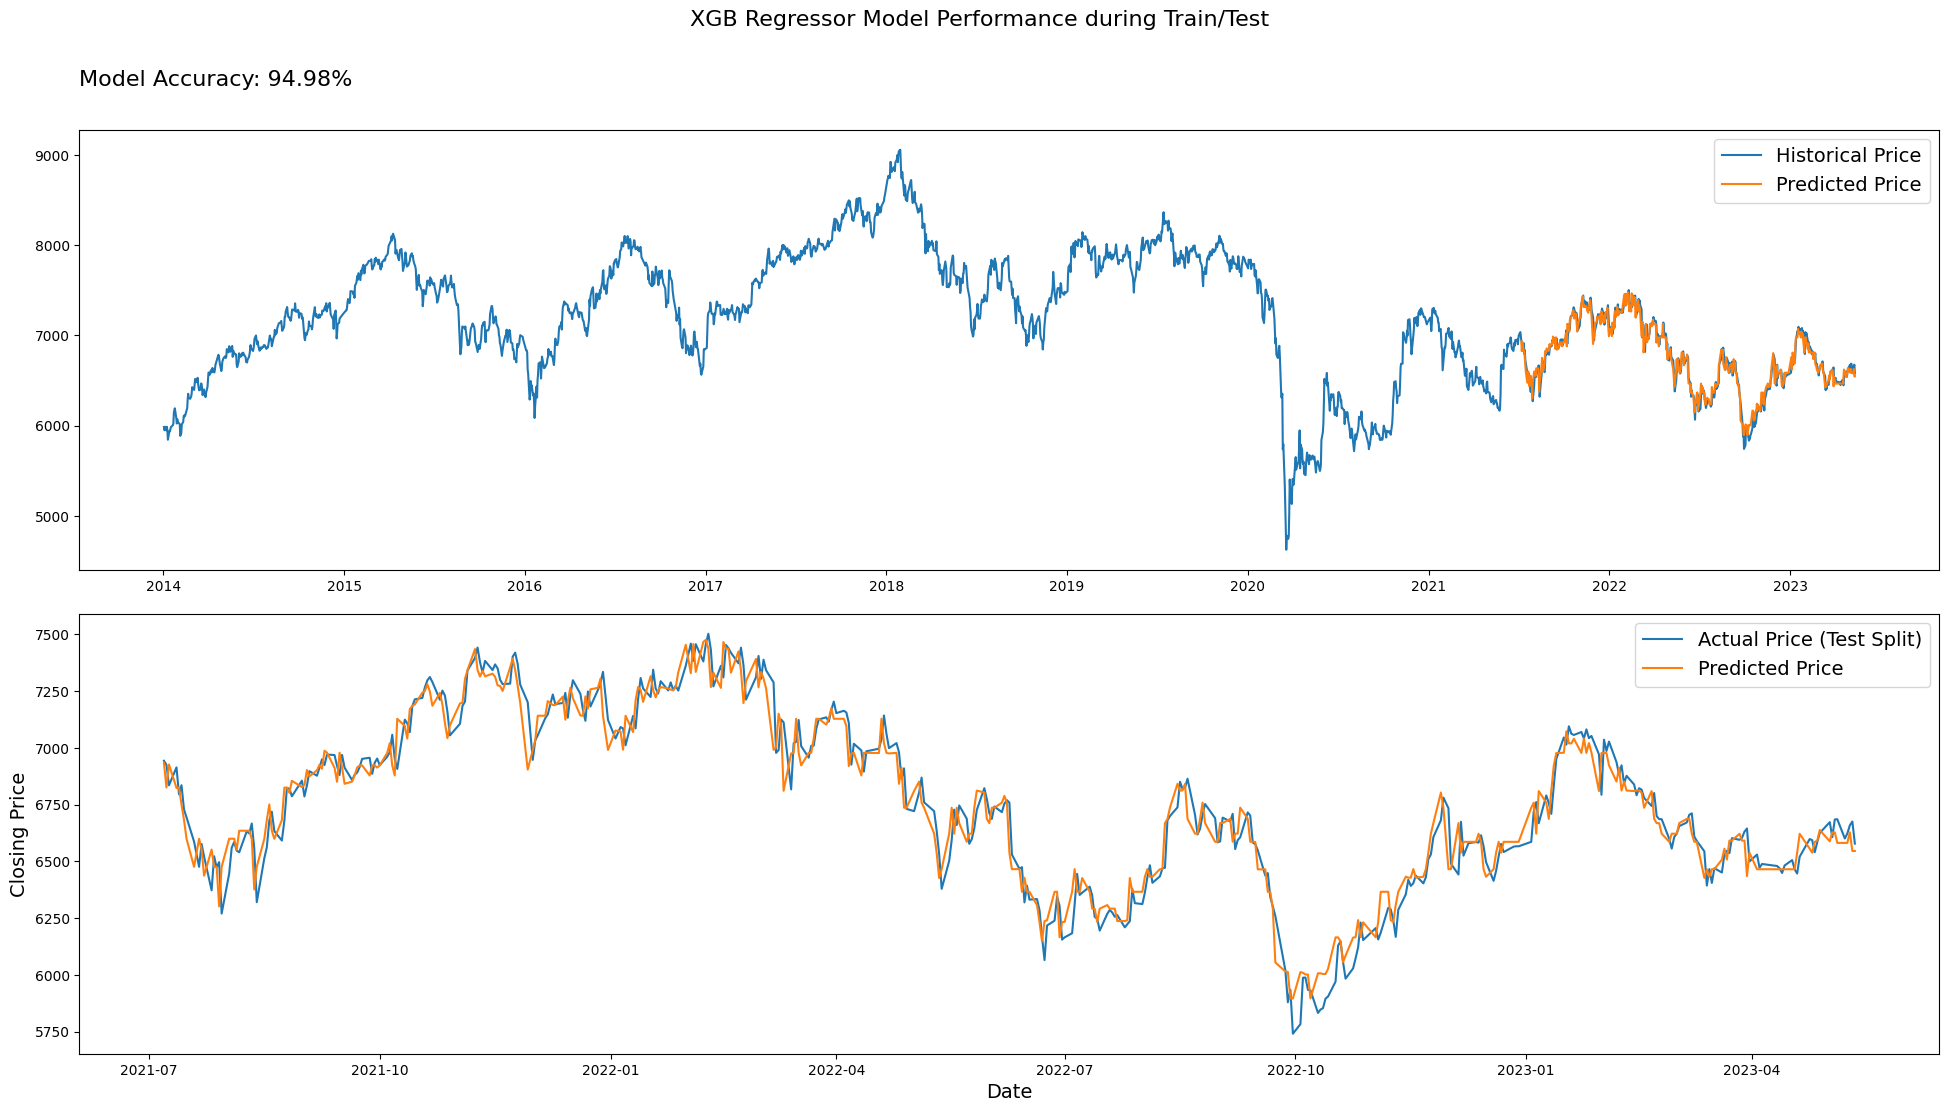

In [37]:
# Predict the unseen data (test data)
predictions = model.predict(X_test)
# Evaluate model accuracy
accuracy = model.score(X_test, y_test) * 100
print('Accuracy: {:.2f}%'.format(accuracy))

# Plot actual vs predicted unseen data
plt.figure(figsize=(24, 12))
plt.subplot(2, 1, 1)
plt.plot(df_xgb_train.index, df_xgb_train['Close'], label = 'Historical Price')
plt.plot(X_test.index, predictions, label = 'Predicted Price' )
plt.legend(fontsize=14)
plt.subplots_adjust(hspace=0.1)
plt.text(0, 1.1, f'Model Accuracy: {accuracy:.2f}%', transform=plt.gca().transAxes, color= 'k', fontsize=16)
plt.subplot(2, 1, 2)
plt.plot(X_test.index, y_test, label='Actual Price (Test Split)')
plt.plot(X_test.index, predictions, label = 'Predicted Price' )
plt.xlabel('Date',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.suptitle('XGB Regressor Model Performance during Train/Test', fontsize=16)
plt.legend(fontsize=14)
plt.show()

Use the trained model to forecast price until May 2024

In [39]:
df_xgb_forecast = df_xgb_forecast.assign(XGB_forecast ='')
df_xgb_forecast['XGB_forecast'] = model.predict(df_xgb_forecast[features])
display(df_xgb_forecast)

,Close,ARIMA,yhat,yhat_lower,yhat_upper,XGB_forecast
Date,,,,,,
2023-05-15,NaN,6581.841660,6355.619044,5995.787554,6713.370209,6545.489746
2023-05-16,NaN,6585.793555,6355.098554,6000.288847,6699.220767,6545.739258
2023-05-17,NaN,6589.719755,6360.768287,6005.890895,6685.831840,6545.739258
2023-05-18,NaN,6593.620427,6363.370239,6028.589258,6701.063831,6581.585449
2023-05-19,NaN,6597.495739,6362.791237,6005.904091,6705.808828,6581.335938
...,...,...,...,...,...,...
2024-05-06,NaN,7074.478350,6109.648197,4174.113305,8005.850510,6846.677734
2024-05-07,NaN,7075.227236,6103.244658,4140.824705,8031.686071,6846.677734
2024-05-08,NaN,7075.971253,6102.751541,4294.808336,8058.391769,6846.677734


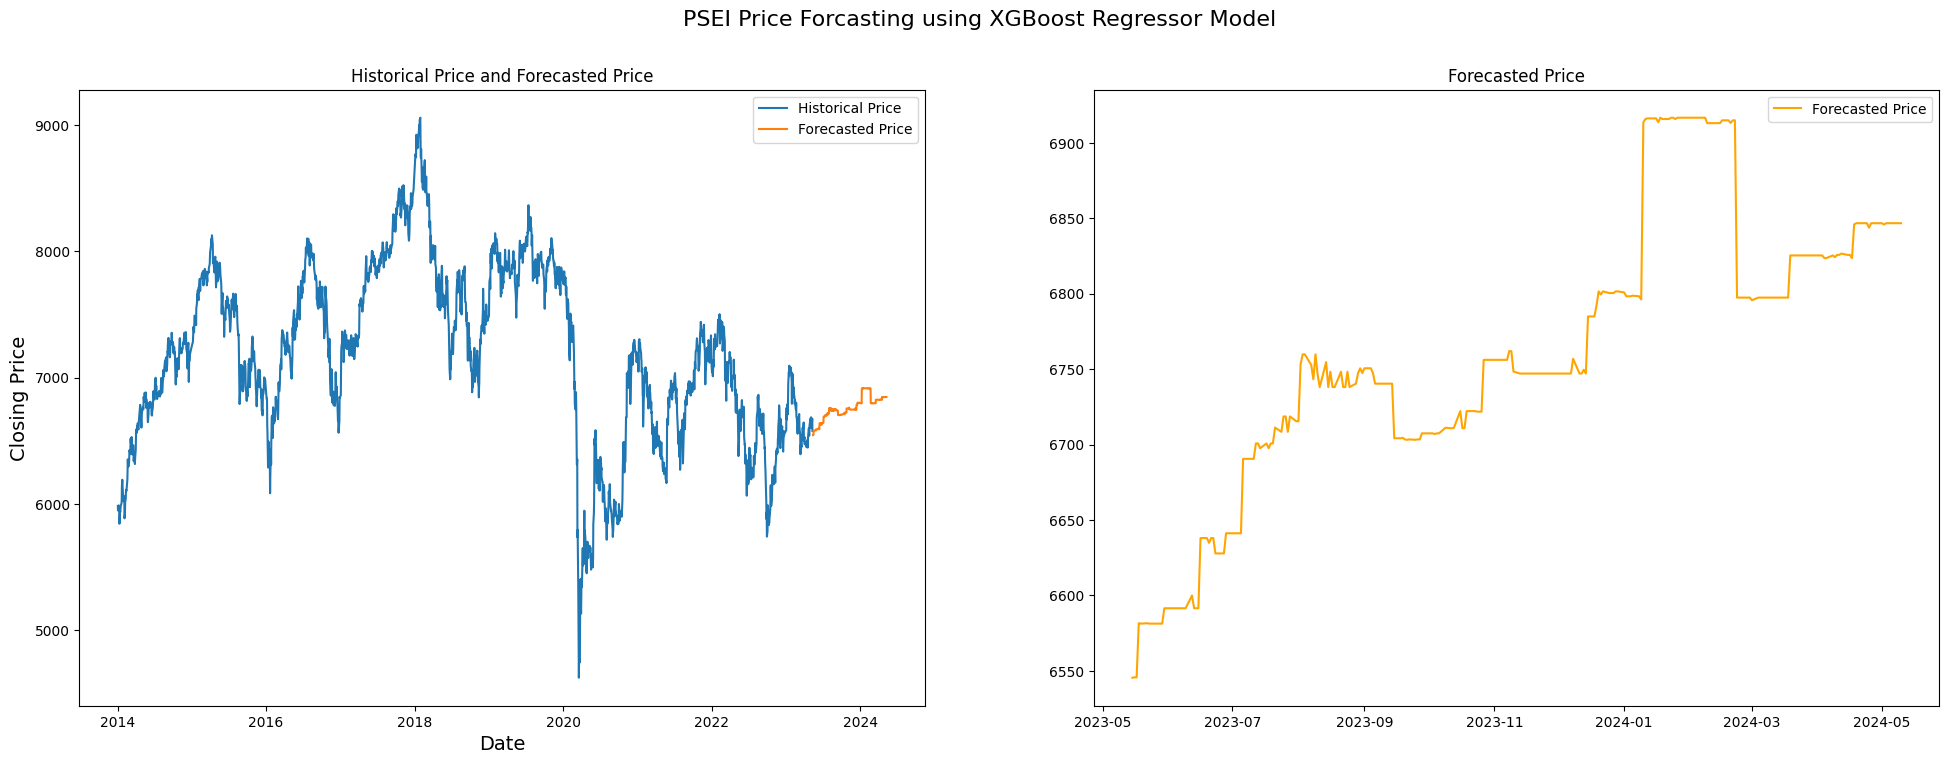

In [41]:
# Visualize results
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(df_price.index, df_price['Close'], label = 'Historical Price')
plt.plot(df_xgb_forecast.index, df_xgb_forecast['XGB_forecast'], label = 'Forecasted Price')
plt.title('Historical Price and Forecasted Price')
plt.legend(fontsize=10)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.subplot(1, 2, 2)
plt.plot(df_xgb_forecast.index, df_xgb_forecast['XGB_forecast'], color='orange', label = 'Forecasted Price')
plt.title('Forecasted Price')
plt.legend(fontsize=10)
plt.suptitle('PSEI Price Forcasting using XGBoost Regressor Model', fontsize=16)
plt.show()

## Summary in Power BI

![Alt text](PSEI-Analysis-Report-images/0001.jpg)

![Alt text](PSEI-Analysis-Report-images/0002.jpg)

![Alt text](PSEI-Analysis-Report-images/0003.jpg)

![Alt text](PSEI-Analysis-Report-images/0004.jpg)